# Demo of PYPIT on LRISr Longslit [v1.1]

In [1]:
# import
from importlib import reload
import os
import glob
import numpy as np

# A few core routines
from pypit.core import arsetup
from pypit.core import arsort
from pypit import arpixels
from pypit.core import arprocimg
from pypit.core import arwave
from pypit.core import arsave
from pypit import arutils
from pypit import arload

# Classes
from pypit import arcimage
from pypit import biasframe
from pypit import bpmimage
from pypit import flatfield
from pypit import fluxspec
from pypit import pypitsetup
from pypit import scienceimage
from pypit import traceimage
from pypit import traceslits
from pypit import wavecalib
from pypit import waveimage
from pypit import wavetilts

## To play along, you need the Development suite and the $PYPIT_DEV environmental variable pointed at it

In [2]:
os.getenv('PYPIT_DEV')

'/home/xavier/local/Python/PYPIT-development-suite/'

## Kuldge for settings

In [3]:
spectrograph='keck_lris_red'

In [4]:
from pypit import arparse as settings
settings.dummy_settings(spectrograph=spectrograph)
settings.argflag['reduce']['masters']['setup'] = 'C_01_aa'
#
# Load default spectrograph settings
spect = settings.get_spect_class(('ARMS', 'keck_lris_red', 'pypit'))# '.'.join(redname.split('.')[:-1])))
lines = spect.load_file(base=True)  # Base spectrograph settings
spect.set_paramlist(lines)
lines = spect.load_file()  # Instrument specific
spect.set_paramlist(lines)

[INFO]    :: arparse.py 75 load_file() - Loading default settings
[INFO]    :: arparse.py 87 load_file() - Loading base settings from settings.baseargflag
[INFO]    :: arparse.py 1393 run_ncpus() - Setting 7 CPUs
[INFO]    :: arparse.py 75 load_file() - Loading default settings
[INFO]    :: arparse.py 75 load_file() - Loading default settings
[INFO]    :: arparse.py 87 load_file() - Loading base settings from settings.basespect
[INFO]    :: arparse.py 75 load_file() - Loading default settings
[INFO]    :: arparse.py 75 load_file() - Loading default settings
[INFO]    :: arparse.py 87 load_file() - Loading base settings from settings.basespect
[INFO]    :: arparse.py 75 load_file() - Loading default settings


## Build the fitstbl

In [5]:
keck_lris_files = glob.glob(os.getenv('PYPIT_DEV')+'RAW_DATA/Keck_LRIS_red/long_600_7500_d560/LR*')
len(keck_lris_files)

23

In [6]:
# Init
setupc = pypitsetup.PypitSetup(settings.argflag, settings.spect)

In [7]:
fitstbl = setupc.build_fitstbl(keck_lris_files)

[WARNING] :: arload.py 159 load_headers() - TARGNAME keyword not in header. Setting to None
[WARNING] :: arload.py 159 load_headers() - RA keyword not in header. Setting to None
[INFO]    :: arload.py 194 load_headers() - Successfully loaded headers for file:
             /home/xavier/local/Python/PYPIT-development-suite/RAW_DATA/Keck_LRIS_red/long_600_7500_d560/LR.20160216.05709.fits
[INFO]    :: arload.py 194 load_headers() - Successfully loaded headers for file:
             /home/xavier/local/Python/PYPIT-development-suite/RAW_DATA/Keck_LRIS_red/long_600_7500_d560/LR.20160216.14244.fits
[INFO]    :: arload.py 194 load_headers() - Successfully loaded headers for file:
             /home/xavier/local/Python/PYPIT-development-suite/RAW_DATA/Keck_LRIS_red/long_600_7500_d560/LR.20160216.05649.fits
[INFO]    :: arload.py 194 load_headers() - Successfully loaded headers for file:
             /home/xavier/local/Python/PYPIT-development-suite/RAW_DATA/Keck_LRIS_red/long_600_7500_d560/LR.20

In [8]:
fitstbl[0:5]

directory,filename,utc,target,idname,time,date,equinox,ra,dec,airmass,naxis0,naxis1,binning,exptime,filter1,filter2,hatch,shutopen,shutclose,decker,lamps,slitwid,slitlen,detrot,dichroic,dispname,dispangle,lampname01,lampstat01,lampname02,lampstat02,lampname03,lampstat03,lampname04,lampstat04,lampname05,lampstat05,lampname06,lampstat06,lampname07,lampstat07,lampname08,lampstat08,lampname09,lampstat09,lampname10,lampstat10,lampname11,lampstat11,lampname12,lampstat12,wavecen,instrume
str92,str22,str11,str14,str4,float64,str19,str4,str11,str11,float64,str4,str4,str3,int64,str5,str4,str6,str4,str4,str8,str4,str4,str4,str4,str3,str8,float64,str7,str3,str4,str3,str5,str3,str7,str3,str4,str3,str7,str3,str5,str3,str7,str3,str9,str3,str6,str3,str6,str3,str7,str3,float64,str13
/home/xavier/local/Python/PYPIT-development-suite/RAW_DATA/Keck_LRIS_red/long_600_7500_d560/,LR.20160216.05529.fits,01:32:09.90,,dark,1378417.5361,2016-02-16T01:32:11,None,00:00:00.00,+00:00:00.0,1.41294028,None,None,"2,2",1,clear,None,closed,None,None,long_0.7,None,None,None,None,560,600/7500,27.0812645,MERCURY,on,NEON,on,ARGON,on,CADMIUM,on,ZINC,on,KRYPTON,on,XENON,on,FEARGON,off,DEUTERIUM,off,FLAMP1,off,FLAMP2,off,HALOGEN,off,7150.0078125,keck_lris_red
/home/xavier/local/Python/PYPIT-development-suite/RAW_DATA/Keck_LRIS_red/long_600_7500_d560/,LR.20160216.05589.fits,01:33:09.40,,dark,1378417.55263,2016-02-16T01:33:11,None,00:00:00.00,+00:00:00.0,1.41294028,None,None,"2,2",1,clear,None,closed,None,None,long_0.7,None,None,None,None,560,600/7500,27.0812645,MERCURY,on,NEON,on,ARGON,on,CADMIUM,on,ZINC,on,KRYPTON,on,XENON,on,FEARGON,off,DEUTERIUM,off,FLAMP1,off,FLAMP2,off,HALOGEN,off,7150.0078125,keck_lris_red
/home/xavier/local/Python/PYPIT-development-suite/RAW_DATA/Keck_LRIS_red/long_600_7500_d560/,LR.20160216.05649.fits,01:34:09.64,,dark,1378417.56936,2016-02-16T01:34:11,None,00:00:00.00,+00:00:00.0,1.41294028,None,None,"2,2",1,clear,None,closed,None,None,long_0.7,None,None,None,None,560,600/7500,27.0812645,MERCURY,on,NEON,on,ARGON,on,CADMIUM,on,ZINC,on,KRYPTON,on,XENON,on,FEARGON,off,DEUTERIUM,off,FLAMP1,off,FLAMP2,off,HALOGEN,off,7150.0078125,keck_lris_red
/home/xavier/local/Python/PYPIT-development-suite/RAW_DATA/Keck_LRIS_red/long_600_7500_d560/,LR.20160216.05709.fits,01:35:09.44,None,dark,1378417.58597,2016-02-16T01:35:11,None,None,+00:00:00.0,1.41294028,None,None,"2,2",1,clear,None,closed,None,None,long_0.7,None,None,None,None,560,600/7500,27.0812645,MERCURY,on,NEON,on,ARGON,on,CADMIUM,on,ZINC,on,KRYPTON,on,XENON,on,FEARGON,off,DEUTERIUM,off,FLAMP1,off,FLAMP2,off,HALOGEN,off,7150.0078125,keck_lris_red
/home/xavier/local/Python/PYPIT-development-suite/RAW_DATA/Keck_LRIS_red/long_600_7500_d560/,LR.20160216.07348.fits,02:02:28.34,None,dark,1378418.04122,2016-02-16T02:02:28,None,15:20:00.00,+45:00:00.0,1.41309745,None,None,"2,2",0,clear,None,closed,None,None,long_0.7,None,None,None,None,560,600/7500,27.0812645,MERCURY,off,NEON,off,ARGON,off,CADMIUM,off,ZINC,off,KRYPTON,off,XENON,off,FEARGON,off,DEUTERIUM,off,FLAMP1,off,FLAMP2,off,HALOGEN,on,7150.0078125,keck_lris_red


## Image type
    Classifies the images
    Adds image type columns to the fitstbl

In [9]:
filetypes = setupc.type_data(flag_unknown=True)

[INFO]    :: arsort.py 110 type_data() - Typing files
[INFO]    :: arsort.py 169 type_data() - Making forced file identification changes
[WARNING] :: arsort.py 170 type_data() - Note that the image will have *only* the specified type
[INFO]    :: arsort.py 188 type_data() - Couldn't identify the following files:
[INFO]    :: arsort.py 190 type_data() - LR.20160216.07348.fits
[INFO]    :: arsort.py 202 type_data() - Typing completed!
[INFO]    :: pypitsetup.py 228 type_data() - Adding file type information to the fitstbl


### Show

In [10]:
setupc.fitstbl[['filename','arc','bias','pixelflat','science','standard','unknown' ]]

filename,arc,bias,pixelflat,science,standard,unknown
str22,bool,bool,bool,bool,bool,bool
LR.20160216.05529.fits,True,False,False,False,False,False
LR.20160216.05589.fits,True,False,False,False,False,False
LR.20160216.05649.fits,True,False,False,False,False,False
LR.20160216.05709.fits,True,False,False,False,False,False
LR.20160216.07348.fits,False,False,False,False,False,True
LR.20160216.07412.fits,False,True,False,False,False,False
LR.20160216.07470.fits,False,True,False,False,False,False
LR.20160216.07529.fits,False,True,False,False,False,False
LR.20160216.07587.fits,False,True,False,False,False,False


## Match to science

In [11]:
fitstbl = setupc.match_to_science()

[INFO]    :: arsort.py 964 match_to_science() - Matching calibrations to Science frames
[INFO]    :: arsort.py 973 match_to_science() - =================================================
[INFO]    :: arsort.py 975 match_to_science() - Matching calibrations to OFF_J1044p6306: LR.20160216.40478.fits
[INFO]    :: arsort.py 1025 match_to_science() -   Found 4 arc frame for OFF_J1044p6306 (1 required)
[INFO]    :: arsort.py 1025 match_to_science() -   Found 10 bias frame for OFF_J1044p6306 (5 required)
[INFO]    :: arsort.py 988 match_to_science() -   Dark frames not required.  Not matching..
[INFO]    :: arsort.py 1002 match_to_science() -    No pinhole frames are required.  Not matching..
[INFO]    :: arsort.py 1025 match_to_science() -   Found 6 pixelflat frame for OFF_J1044p6306 (3 required)
[INFO]    :: arsort.py 1025 match_to_science() -   Found 1 standard frame for OFF_J1044p6306 (1 required)
[INFO]    :: arsort.py 1025 match_to_science() -   Found 6 trace frame for OFF_J1044p6306 (3 

### Setup dict

In [12]:
setup_dict = setupc.build_setup_dict()

In [13]:
setup_dict

{'A': {'--': {'dichroic': '560',
   'disperser': {'angle': 27.0812645, 'name': '600/7500'},
   'slit': {'decker': 'long_0.7', 'slitlen': 'None', 'slitwid': 'None'}},
  '01': {'binning': '2,2', 'det': 1, 'namp': 2},
  '02': {'binning': '2,2', 'det': 2, 'namp': 2},
  'aa': {'arc': ['LR.20160216.05709.fits'],
   'bias': ['LR.20160216.07703.fits',
    'LR.20160216.07762.fits',
    'LR.20160216.07820.fits',
    'LR.20160216.07878.fits',
    'LR.20160216.07937.fits'],
   'pixelflat': ['LR.20160216.14244.fits',
    'LR.20160216.14322.fits',
    'LR.20160216.14399.fits'],
   'science': ['LR.20160216.40478.fits'],
   'trace': ['LR.20160216.14244.fits',
    'LR.20160216.14322.fits',
    'LR.20160216.14399.fits']}}}

In [14]:
setupc.fitstbl[['filename','arc','bias','pixelflat','science','standard','sci_ID']]

filename,arc,bias,pixelflat,science,standard,sci_ID
str22,bool,bool,bool,bool,bool,int64
LR.20160216.05529.fits,True,False,False,False,False,0
LR.20160216.05589.fits,True,False,False,False,False,0
LR.20160216.05649.fits,True,False,False,False,False,0
LR.20160216.05709.fits,True,False,False,False,False,1
LR.20160216.07348.fits,False,False,False,False,False,0
LR.20160216.07412.fits,False,True,False,False,False,0
LR.20160216.07470.fits,False,True,False,False,False,0
LR.20160216.07529.fits,False,True,False,False,False,0
LR.20160216.07587.fits,False,True,False,False,False,0


## Setup :: command line
    pypit_setup /home/xavier/local/Python/PYPIT-development-suite/RAW_DATA/Keck_LRIS_red/long_600_7500_d560/LR.20160216 keck_lris_red -c

In [15]:
cols = ['filename', 'target']+setupc.ftypes+['failures', 'sci_ID']

In [16]:
setupc.fitstbl[cols]

filename,target,arc,bias,dark,pinhole,pixelflat,science,standard,trace,unknown,failures,sci_ID
str22,str14,bool,bool,bool,bool,bool,bool,bool,bool,bool,bool,int64
LR.20160216.05529.fits,,True,False,False,False,False,False,False,False,False,False,0
LR.20160216.05589.fits,,True,False,False,False,False,False,False,False,False,False,0
LR.20160216.05649.fits,,True,False,False,False,False,False,False,False,False,False,0
LR.20160216.05709.fits,None,True,False,False,False,False,False,False,False,False,False,1
LR.20160216.07348.fits,None,False,False,False,False,False,False,False,False,True,False,0
LR.20160216.07412.fits,unknown,False,True,False,False,False,False,False,False,False,False,0
LR.20160216.07470.fits,unknown,False,True,False,False,False,False,False,False,False,False,0
LR.20160216.07529.fits,unknown,False,True,False,False,False,False,False,False,False,False,0
LR.20160216.07587.fits,unknown,False,True,False,False,False,False,False,False,False,False,0


----

## Setup + datasec

In [17]:
# Image IDs
sci_ID = 1  # First exposure ID
det = 2     # Slitb for LRIS
dnum = 'det02'

In [18]:
# Index in fitstbl
scidx = np.where((fitstbl['sci_ID'] == sci_ID) & fitstbl['science'])[0][0]
scidx

22

### Settings

In [19]:
settings_det = settings.spect[dnum].copy()  # Should include naxis0, naxis1 in this

In [20]:
settings_det

{'darkcurr': 0.0,
 'gain': [1.191, 1.162],
 'nonlinear': 0.76,
 'numamplifiers': 2,
 'platescale': 0.135,
 'ronoise': [4.54, 4.62],
 'saturation': 65535.0,
 'suffix': '_02red',
 'xgap': 0.0,
 'ygap': 0.0,
 'ysize': 1.0}

In [21]:
# Ugliness
settings_det['binning'] = fitstbl['binning'][0]
#
settings.spect[dnum] = settings_det.copy()  # Used internally..
#
tsettings = settings.argflag.copy()
tsettings['detector'] = settings.spect[settings.get_dnum(det)]
tsettings['detector']['dataext'] = None
tsettings['detector']['dispaxis'] = settings.argflag['trace']['dispersion']['direction']

### Setup

In [22]:
setup = arsetup.instr_setup(sci_ID, det, fitstbl, setup_dict, settings_det['numamplifiers'], must_exist=True)
setup

'A_02_aa'

### datasec

In [23]:
scifile = os.path.join(fitstbl['directory'][scidx],fitstbl['filename'][scidx])

In [24]:
datasec_img, naxis0, naxis1 = arprocimg.get_datasec_trimmed(
    spectrograph, scifile, det, settings_det,
    naxis0=fitstbl['naxis0'][scidx],
    naxis1=fitstbl['naxis1'][scidx])

[INFO]    :: arprocimg.py 174 get_datasec() - Parsing datasec and oscansec from headers
[INFO]    :: arlris.py 48 read_lris() - Reading LRIS file: /home/xavier/local/Python/PYPIT-development-suite/RAW_DATA/Keck_LRIS_red/long_600_7500_d560/LR.20160216.40478.fits


In [25]:
datasec_img.shape, naxis0, naxis1

((2048, 1024), 2068, 1110)

In [26]:
fitstbl['naxis0'][scidx] = naxis0
fitstbl['naxis1'][scidx] = naxis1

----

## Bias

In [27]:
tsettings['bias']['combine']['reject']['cosmics'] = 3.

In [28]:
biasFrame = biasframe.BiasFrame(settings=tsettings, setup=setup,
                                    det=det, fitstbl=fitstbl, sci_ID=sci_ID)

In [29]:
msbias = biasFrame.build_image()

[INFO]    :: arload.py 327 load_raw_frame() - Loading raw_file: /home/xavier/local/Python/PYPIT-development-suite/RAW_DATA/Keck_LRIS_red/long_600_7500_d560/LR.20160216.07703.fits
[INFO]    :: arlris.py 48 read_lris() - Reading LRIS file: /home/xavier/local/Python/PYPIT-development-suite/RAW_DATA/Keck_LRIS_red/long_600_7500_d560/LR.20160216.07703.fits
[INFO]    :: arload.py 327 load_raw_frame() - Loading raw_file: /home/xavier/local/Python/PYPIT-development-suite/RAW_DATA/Keck_LRIS_red/long_600_7500_d560/LR.20160216.07762.fits
[INFO]    :: arlris.py 48 read_lris() - Reading LRIS file: /home/xavier/local/Python/PYPIT-development-suite/RAW_DATA/Keck_LRIS_red/long_600_7500_d560/LR.20160216.07762.fits
[INFO]    :: arload.py 327 load_raw_frame() - Loading raw_file: /home/xavier/local/Python/PYPIT-development-suite/RAW_DATA/Keck_LRIS_red/long_600_7500_d560/LR.20160216.07820.fits
[INFO]    :: arlris.py 48 read_lris() - Reading LRIS file: /home/xavier/local/Python/PYPIT-development-suite/RAW_DA

In [30]:
msbias.shape

(2068, 1110)

In [31]:
biasFrame.show()

----

## Arc Image frame

In [32]:
arcImage = arcimage.ArcImage([], spectrograph=spectrograph,
                             settings=tsettings, det=det, setup=setup,
                             sci_ID=sci_ID, msbias=msbias, fitstbl=fitstbl)

In [33]:
msarc = arcImage.build_image()

[INFO]    :: arload.py 327 load_raw_frame() - Loading raw_file: /home/xavier/local/Python/PYPIT-development-suite/RAW_DATA/Keck_LRIS_red/long_600_7500_d560/LR.20160216.05709.fits
[INFO]    :: arlris.py 48 read_lris() - Reading LRIS file: /home/xavier/local/Python/PYPIT-development-suite/RAW_DATA/Keck_LRIS_red/long_600_7500_d560/LR.20160216.05709.fits
[INFO]    :: arprocimg.py 174 get_datasec() - Parsing datasec and oscansec from headers
[INFO]    :: arlris.py 48 read_lris() - Reading LRIS file: /home/xavier/local/Python/PYPIT-development-suite/RAW_DATA/Keck_LRIS_red/long_600_7500_d560/LR.20160216.05709.fits
[INFO]    :: processimages.py 272 bias_subtract() - Bias subtracting your image(s)
[INFO]    :: arprocimg.py 77 bias_subtract() - Subtracting bias image from raw frame


In [34]:
arcImage.show()

----

## Bad pixel mask

In [35]:
bpmImage = bpmimage.BPMImage(spectrograph=spectrograph,
                             settings=tsettings, det=det,
                             shape=msarc.shape,
                             binning=fitstbl['binning'][scidx],
                             reduce_badpix=False,
                             msbias=msbias)

In [36]:
msbpm = bpmImage.build()

[INFO]    :: arlris.py 384 bpm() - Using hard-coded BPM for det=2 on LRISr


In [37]:
msbpm.shape

(2048, 1024)

----

## pixlocn

In [38]:
pixlocn = arpixels.gen_pixloc(msarc.shape, det, settings.argflag)

[INFO]    :: arpixels.py 66 core_gen_pixloc() - Deriving physical pixel locations on the detector
[INFO]    :: arpixels.py 69 core_gen_pixloc() - Pixel gap in the dispersion direction = 0.000
[INFO]    :: arpixels.py 70 core_gen_pixloc() - Pixel size in the dispersion direction = 1.000
[INFO]    :: arpixels.py 73 core_gen_pixloc() - Pixel gap in the spatial direction = 0.000
[INFO]    :: arpixels.py 74 core_gen_pixloc() - Pixel size in the spatial direction = 1.000
[INFO]    :: arpixels.py 79 core_gen_pixloc() - Saving pixel locations


----

## Trace slit(s)

In [39]:
# Settings
ts_settings = dict(trace=settings.argflag['trace'], masters=settings.argflag['reduce']['masters'])

In [40]:
# Instantiate (without mstrace)
traceSlits = traceslits.TraceSlits(None, pixlocn, settings=ts_settings,
                                   det=det, setup=setup, binbpx=msbpm)

### Build the trace image first

In [41]:
trace_image_files = arsort.list_of_files(fitstbl, 'trace', sci_ID)
Timage = traceimage.TraceImage(trace_image_files,
                               spectrograph=spectrograph,
                               settings=tsettings, det=det,
                               datasec_img=datasec_img)
mstrace = Timage.process(bias_subtract=msbias, trim=True, apply_gain=True)

[INFO]    :: arload.py 327 load_raw_frame() - Loading raw_file: /home/xavier/local/Python/PYPIT-development-suite/RAW_DATA/Keck_LRIS_red/long_600_7500_d560/LR.20160216.14244.fits
[INFO]    :: arlris.py 48 read_lris() - Reading LRIS file: /home/xavier/local/Python/PYPIT-development-suite/RAW_DATA/Keck_LRIS_red/long_600_7500_d560/LR.20160216.14244.fits
[INFO]    :: arload.py 327 load_raw_frame() - Loading raw_file: /home/xavier/local/Python/PYPIT-development-suite/RAW_DATA/Keck_LRIS_red/long_600_7500_d560/LR.20160216.14322.fits
[INFO]    :: arlris.py 48 read_lris() - Reading LRIS file: /home/xavier/local/Python/PYPIT-development-suite/RAW_DATA/Keck_LRIS_red/long_600_7500_d560/LR.20160216.14322.fits
[INFO]    :: arload.py 327 load_raw_frame() - Loading raw_file: /home/xavier/local/Python/PYPIT-development-suite/RAW_DATA/Keck_LRIS_red/long_600_7500_d560/LR.20160216.14399.fits
[INFO]    :: arlris.py 48 read_lris() - Reading LRIS file: /home/xavier/local/Python/PYPIT-development-suite/RAW_DA

In [42]:
Timage.show()

### Now trace

In [43]:
# Load up and get ready
traceSlits.mstrace = mstrace
_ = traceSlits.make_binarr()
# Now we go forth
tslits_dict = traceSlits.run(arms=True)
# QA
traceSlits._qa()

[INFO]    :: artraceslits.py 826 edgearr_from_binarr() - Detecting slit edges in the mstrace image
[INFO]    :: artraceslits.py 888 edgearr_from_binarr() - Applying bad pixel mask
[INFO]    :: artraceslits.py 946 edgearr_add_left_right() - 1 left edge and 1 right edge were found in the trace
[INFO]    :: artraceslits.py 972 edgearr_add_left_right() - Assigning slit edge traces
[INFO]    :: traceslits.py 363 _assign_edges() - Assigning left slit edges
[INFO]    :: traceslits.py 369 _assign_edges() - Assigning right slit edges
[INFO]    :: artraceslits.py 1160 edgearr_final_left_right() - 1 left edge and 1 right edge were found in the trace
[INFO]    :: artraceslits.py 574 edgearr_tcrude() - Crude tracing the edges
[INFO]    :: artraceslits.py 1329 fit_edges() - Fitting left slit traces
[INFO]    :: artraceslits.py 1331 fit_edges() - Fitting right slit traces
[INFO]    :: traceslits.py 392 _chk_for_longslit() - Only one slit was identified. Should be a longslit.
[INFO]    :: traceslits.p

In [44]:
traceSlits.show('edges')

In [45]:
# Initialize maskslits
nslits = tslits_dict['lcen'].shape[1]
maskslits = np.zeros(nslits, dtype=bool)

----

## Wavelength Calibration

In [46]:
# Settings
wvc_settings = dict(calibrate=settings.argflag['arc']['calibrate'], masters=settings.argflag['reduce']['masters'])

In [47]:
# Instantiate
waveCalib = wavecalib.WaveCalib(msarc, spectrograph=spectrograph,
                                settings=wvc_settings, det=det,
                                setup=setup, fitstbl=fitstbl, sci_ID=sci_ID)

In [48]:
# Run
wv_calib, _ = waveCalib.run(tslits_dict['lcen'], tslits_dict['rcen'],
                                    pixlocn, nonlinear=settings_det['nonlinear'])

[INFO]    :: ararc.py 85 get_censpec() - Extracting an approximate arc spectrum at the centre of each slit
[INFO]    :: ararc.py 439 setup_param() - Loading line list using ArI,NeI,HgI,KrI,XeI lamps
[INFO]    :: ararclines.py 68 load_arcline_list() - Rejecting select ArI lines
[INFO]    :: ararclines.py 68 load_arcline_list() - Rejecting select NeI lines
[INFO]    :: ararclines.py 68 load_arcline_list() - Rejecting select HgI lines
[INFO]    :: ararclines.py 76 load_arcline_list() - Cutting down line list by wvmnx: 2900,11000


---------------------------------------------------
Report:
::   Number of lines recovered    = 83
::   Number of lines analyzed     = 83
::   Number of acceptable matches = 81
::   Best central wavelength      = 7174.84A
::   Best dispersion              = 1.59702A/pix
::   Best solution used pix_tol   = 1.0
::   Best solution had unknown    = True
---------------------------------------------------


In [49]:
wv_calib['arcparam']

{'Nstrong': 13,
 'b1': 0.00030517578125,
 'b2': 0.0,
 'disp': 1.6,
 'disp_toler': 0.1,
 'func': 'legendre',
 'lamps': ['ArI', 'NeI', 'HgI', 'KrI', 'XeI'],
 'match_toler': 3.0,
 'min_ampl': 300.0,
 'n_final': 4,
 'n_first': 3,
 'nsig_rej': 2.0,
 'nsig_rej_final': 3.0,
 'wv_cen': 7150.0078125,
 'wvmnx': [2900.0, 11000.0]}

In [50]:
wv_calib['0'].keys()

dict_keys(['fitc', 'function', 'xfit', 'yfit', 'ions', 'fmin', 'fmax', 'xnorm', 'xrej', 'yrej', 'mask', 'spec', 'nrej', 'shift', 'tcent', 'rms'])

----

## Wave Tilts

In [51]:
# Settings kludges
tilt_settings = dict(tilts=settings.argflag['trace']['slits']['tilts'].copy(),
                     masters=settings.argflag['reduce']['masters'])
tilt_settings['tilts']['function'] = settings.argflag['trace']['slits']['function']

In [52]:
# Instantiate
waveTilts = wavetilts.WaveTilts(msarc, settings=tilt_settings,
                                    det=det, setup=setup,
                                    tslits_dict=tslits_dict, settings_det=settings_det,
                                    pixlocn=pixlocn)

In [53]:
# Run
mstilts, wt_maskslits = waveTilts.run(maskslits=maskslits, wv_calib=wv_calib)

[INFO]    :: ararc.py 85 get_censpec() - Extracting an approximate arc spectrum at the centre of each slit
[WORK IN ]::
[PROGRESS]:: artracewave.py 205 trace_tilt() - Detecting lines for slit 1
[INFO]    :: ararc.py 177 detect_lines() - Detecting lines
[INFO]    :: ararc.py 203 detect_lines() - Detecting the strongest, nonsaturated lines
[INFO]    :: artracewave.py 263 trace_tilt() - Modelling arc line tilts with 51 arc lines
[WORK IN ]::
[PROGRESS]:: artracewave.py 269 trace_tilt() - This next step could be multiprocessed to speed up the reduction
[INFO]    :: artracewave.py 437 trace_tilt() - Completed spectral tilt tracing
[WARNING] :: wavetilts.py 192 _analyze_lines() - There were 13 additional arc lines that should have been traced
             (perhaps lines were saturated?). Check the spectral tilt solution
[INFO]    :: artracewave.py 780 fit_tilts() - Fitting tilts with a low order, 2D legendre
[WORK IN ]::
[PROGRESS]:: arutils.py 811 polyfit2d_general() - Generalize to differe

In [54]:
waveTilts.show('fweight', slit=0)

[INFO]    :: wavetilts.py 429 show() - Green = ok line;  red=not used


In [55]:
waveTilts.show('tilts', slit=0)

[WARNING] :: wavetilts.py 464 show() - Display via tilts is not exact


----

## Pixel Flat Field

In [56]:
# Settings
flat_settings = dict(flatfield=settings.argflag['reduce']['flatfield'].copy(),
                     slitprofile=settings.argflag['reduce']['slitprofile'].copy(),
                     combine=settings.argflag['pixelflat']['combine'].copy(),
                     masters=settings.argflag['reduce']['masters'].copy(),
                     detector=settings.spect[dnum])

In [57]:
# Instantiate
pixflat_image_files = arsort.list_of_files(fitstbl, 'pixelflat', sci_ID)
flatField = flatfield.FlatField(file_list=pixflat_image_files, msbias=msbias,
                                spectrograph=spectrograph,
                                settings=flat_settings,
                                tslits_dict=tslits_dict,
                                tilts=mstilts, det=det, setup=setup,
                                datasec_img=datasec_img)

In [58]:
# Run
mspixflatnrm, slitprof = flatField.run(armed=False)

[INFO]    :: arload.py 327 load_raw_frame() - Loading raw_file: /home/xavier/local/Python/PYPIT-development-suite/RAW_DATA/Keck_LRIS_red/long_600_7500_d560/LR.20160216.14244.fits
[INFO]    :: arlris.py 48 read_lris() - Reading LRIS file: /home/xavier/local/Python/PYPIT-development-suite/RAW_DATA/Keck_LRIS_red/long_600_7500_d560/LR.20160216.14244.fits
[INFO]    :: arload.py 327 load_raw_frame() - Loading raw_file: /home/xavier/local/Python/PYPIT-development-suite/RAW_DATA/Keck_LRIS_red/long_600_7500_d560/LR.20160216.14322.fits
[INFO]    :: arlris.py 48 read_lris() - Reading LRIS file: /home/xavier/local/Python/PYPIT-development-suite/RAW_DATA/Keck_LRIS_red/long_600_7500_d560/LR.20160216.14322.fits
[INFO]    :: arload.py 327 load_raw_frame() - Loading raw_file: /home/xavier/local/Python/PYPIT-development-suite/RAW_DATA/Keck_LRIS_red/long_600_7500_d560/LR.20160216.14399.fits
[INFO]    :: arlris.py 48 read_lris() - Reading LRIS file: /home/xavier/local/Python/PYPIT-development-suite/RAW_DA

In [59]:
flatField.show('norm')

----

## Wavelength Image

In [60]:
# Settings
wvimg_settings = dict(masters=settings.argflag['reduce']['masters'].copy())

In [61]:
# Instantiate
waveImage = waveimage.WaveImage(mstilts, wv_calib, settings=wvimg_settings,
                                    setup=setup, maskslits=maskslits,
                                    slitpix=tslits_dict['slitpix'])

In [62]:
# Build
mswave = waveImage._build_wave()

In [63]:
waveImage.show('wave')

----

## Science Image

### File list

In [64]:
sci_image_files = arsort.list_of_files(fitstbl, 'science', sci_ID)

In [65]:
# Settings
sci_settings = tsettings.copy()

### Instantiate

In [66]:
# Instantiate
sciI = scienceimage.ScienceImage(file_list=sci_image_files, datasec_img=datasec_img,
                                 bpm=msbpm, det=det, setup=setup, settings=sci_settings,
                                 maskslits=maskslits, pixlocn=pixlocn, tslits_dict=tslits_dict,
                                 tilts=mstilts, fitstbl=fitstbl, scidx=scidx)

### Name, time

In [67]:
# Names and time
obstime, basename = sciI.init_time_names(settings.spect['mosaic']['camera'],
                timeunit=settings.spect["fits"]["timeunit"])
basename

'OFF_J1044p6306_LRISr_2016Feb16T112439'

### Process

In [68]:
# Process (includes Variance image and CRs)
dnoise = (settings_det['darkcurr'] * float(fitstbl["exptime"][scidx])/3600.0)
sciframe, rawvarframe, crmask = sciI._process(
    msbias, mspixflatnrm, apply_gain=True, dnoise=dnoise)

[INFO]    :: arload.py 327 load_raw_frame() - Loading raw_file: /home/xavier/local/Python/PYPIT-development-suite/RAW_DATA/Keck_LRIS_red/long_600_7500_d560/LR.20160216.40478.fits
[INFO]    :: arlris.py 48 read_lris() - Reading LRIS file: /home/xavier/local/Python/PYPIT-development-suite/RAW_DATA/Keck_LRIS_red/long_600_7500_d560/LR.20160216.40478.fits
[INFO]    :: arprocimg.py 174 get_datasec() - Parsing datasec and oscansec from headers
[INFO]    :: arlris.py 48 read_lris() - Reading LRIS file: /home/xavier/local/Python/PYPIT-development-suite/RAW_DATA/Keck_LRIS_red/long_600_7500_d560/LR.20160216.40478.fits
[INFO]    :: processimages.py 272 bias_subtract() - Bias subtracting your image(s)
[INFO]    :: arprocimg.py 77 bias_subtract() - Subtracting bias image from raw frame
[WARNING] :: arprocimg.py 505 gain_frame() - Should probably be measuring the gain across the amplifier boundary
[INFO]    :: processimages.py 430 build_rawvarframe() - Generate raw variance frame (from detected count

In [69]:
sciI.show('sci')

### Global sky sub

In [70]:
# Global skysub
settings_skysub = {}
settings_skysub['skysub'] = settings.argflag['reduce']['skysub'].copy()
global_sky, modelvarframe = sciI.global_skysub(settings_skysub)

[INFO]    :: scienceimage.py 459 global_skysub() - Working on slit: 0
[INFO]    :: arutils.py 198 bspline_profile() - Fitting npoly =  1 profile basis functions, nx=584071 pixels
[INFO]    :: arutils.py 199 bspline_profile() - ****************************  Iter  Chi^2  # rejected  Rel. fact   ****************************
[INFO]    :: arutils.py 200 bspline_profile() -                               ----  -----  ----------  --------- 
[INFO]    :: arutils.py 281 bspline_profile() -                                 1   0.003        0        1.00
[INFO]    :: arutils.py 286 bspline_profile() - ***********************************************************************************************
[INFO]    :: arutils.py 289 bspline_profile() - Final fit after  1 iterations: reduced_chi =    0.003, rejected =       0, relative_factor =   1.00
[INFO]    :: arutils.py 198 bspline_profile() - Fitting npoly =  1 profile basis functions, nx=584197 pixels
[INFO]    :: arutils.py 199 bspline_profile() - ***

In [71]:
sciI.show('skysub')

### Find objects

In [72]:
_, nobj = sciI.find_objects()

[INFO]    :: artrace.py 285 trace_objects_in_slit() - Rectifying science frame
[INFO]    :: artrace.py 306 trace_objects_in_slit() - Estimating object profiles
[INFO]    :: artrace.py 375 trace_objects_in_slit() - Identifying objects that are significantly detected
[WARNING] :: artrace.py 430 trace_objects_in_slit() - Removed objects near the slit edges
[INFO]    :: artrace.py 461 trace_objects_in_slit() - Found 4 objects
[INFO]    :: artrace.py 462 trace_objects_in_slit() - Tracing 4 objects
[INFO]    :: artrace.py 498 trace_objects_in_slit() - Performing global trace to all objects
[INFO]    :: artrace.py 501 trace_objects_in_slit() - Constructing a trace for all objects
[INFO]    :: artrace.py 509 trace_objects_in_slit() - Converting object traces to detector pixels
[INFO]    :: artrace.py 90 trace_objbg_image() - Creating an image weighted by object pixels for 4 objects
[INFO]    :: artrace.py 99 trace_objbg_image() - Creating an image weighted by background pixels


### Repeat the last 2 steps

In [73]:
# Mask the objects
global_sky, modelvarframe = sciI.global_skysub(settings_skysub, use_tracemask=True)
# Another round of finding objects
_, nobj = sciI.find_objects()  

[INFO]    :: scienceimage.py 459 global_skysub() - Working on slit: 0
[INFO]    :: arutils.py 198 bspline_profile() - Fitting npoly =  1 profile basis functions, nx=519297 pixels
[INFO]    :: arutils.py 199 bspline_profile() - ****************************  Iter  Chi^2  # rejected  Rel. fact   ****************************
[INFO]    :: arutils.py 200 bspline_profile() -                               ----  -----  ----------  --------- 
[INFO]    :: arutils.py 281 bspline_profile() -                                 1   0.003        0        1.00
[INFO]    :: arutils.py 286 bspline_profile() - ***********************************************************************************************
[INFO]    :: arutils.py 289 bspline_profile() - Final fit after  1 iterations: reduced_chi =    0.003, rejected =       0, relative_factor =   1.00
[INFO]    :: arutils.py 198 bspline_profile() - Fitting npoly =  1 profile basis functions, nx=519420 pixels
[INFO]    :: arutils.py 199 bspline_profile() - ***

### Extraction -- New algorithm in development

In [74]:
specobjs, finalvar, finalsky = sciI.extraction(mswave)

[INFO]    :: scienceimage.py 278 boxcar() - Performing boxcar extraction
[INFO]    :: arextract.py 80 boxcar() - Performing boxcar extraction of object 1/4 in slit 1/1
[INFO]    :: arextract.py 89 boxcar() -    Fitting the background
[INFO]    :: arextract.py 166 boxcar() -    Summing object counts
[INFO]    :: arextract.py 169 boxcar() -    Summing variance array
[INFO]    :: arextract.py 80 boxcar() - Performing boxcar extraction of object 2/4 in slit 1/1
[INFO]    :: arextract.py 89 boxcar() -    Fitting the background
[INFO]    :: arextract.py 166 boxcar() -    Summing object counts
[INFO]    :: arextract.py 169 boxcar() -    Summing variance array
[INFO]    :: arextract.py 80 boxcar() - Performing boxcar extraction of object 3/4 in slit 1/1
[INFO]    :: arextract.py 89 boxcar() -    Fitting the background
[INFO]    :: arextract.py 166 boxcar() -    Summing object counts
[INFO]    :: arextract.py 169 boxcar() -    Summing variance array
[INFO]    :: arextract.py 80 boxcar() - Perfo

[WORK IN ]::
[PROGRESS]:: arextract.py 323 obj_profiles() - Consider flagging/removing CRs here
[INFO]    :: arextract.py 261 obj_profiles() - Deriving spatial profile of object 2/4 in slit 1/1
[WORK IN ]::
[PROGRESS]:: artrace.py 1819 slit_image() - Use 2D spline to evaluate tilts
[WORK IN ]::
[PROGRESS]:: artrace.py 1824 slit_image() - Should worry about changing plate scale
[INFO]    :: arextract.py 284 obj_profiles() - Good S/N for profile
[WORK IN ]::
[PROGRESS]:: arextract.py 294 obj_profiles() - Weight by S/N in boxcar extraction? [avoid CRs; smooth?]
[WORK IN ]::
[PROGRESS]:: arextract.py 303 obj_profiles() - Might give our own guess here instead of using default
[WORK IN ]::
[PROGRESS]:: arextract.py 323 obj_profiles() - Consider flagging/removing CRs here
[INFO]    :: arextract.py 261 obj_profiles() - Deriving spatial profile of object 3/4 in slit 1/1
[WORK IN ]::
[PROGRESS]:: artrace.py 1819 slit_image() - Use 2D spline to evaluate tilts
[WORK IN ]::
[PROGRESS]:: artrace.py 

### Flexure

In [75]:
flex_list = arwave.flexure_obj(
    specobjs, maskslits, settings.argflag['reduce']['flexure']['method'],
    spectrograph,
    skyspec_fil = settings.argflag['reduce']['flexure']['spectrum'],
    mxshft = settings.argflag['reduce']['flexure']['maxshift'])

[WORK IN ]::
[PROGRESS]:: arwave.py 281 flexure_obj() - Consider doing 2 passes in flexure as in LowRedux
[INFO]    :: arwave.py 204 flexure_archive() - Using paranal_sky.fits file for Sky spectrum
[INFO]    :: arwave.py 297 flexure_obj() - Working on flexure in slit (if an object was detected): 0
[WARNING] :: arwave.py 44 flex_shift() - If we use Paranal, cut down on wavelength early on
[INFO]    :: ararc.py 177 detect_lines() - Detecting lines
[INFO]    :: ararc.py 203 detect_lines() - Detecting the strongest, nonsaturated lines
[INFO]    :: ararc.py 177 detect_lines() - Detecting lines
[INFO]    :: ararc.py 203 detect_lines() - Detecting the strongest, nonsaturated lines
[INFO]    :: arwave.py 72 flex_shift() - Resolution of Archive=34127.6 and Observation=2744.53
[WORK IN ]::
[PROGRESS]:: arwave.py 137 flex_shift() - Need to mask bad pixels
[WORK IN ]::
[PROGRESS]:: arwave.py 140 flex_shift() - Consider taking median first [5 pixel]
[WORK IN ]::
[PROGRESS]:: arwave.py 153 flex_shif

In [76]:
# QA 
arwave.flexure_qa(specobjs, maskslits, basename, det, flex_list)

### Heliocentric (optional)

In [77]:
vel, vel_corr = arwave.geomotion_correct(specobjs, maskslits, fitstbl, scidx,
                                         obstime, settings.spect,
                                         settings.argflag['reduce']['calibrate']['refframe'])

[INFO]    :: arwave.py 403 geomotion_correct() - Applying heliocentric correction to boxcar extraction for object:
             <SpecObjExp: O221-S1517-D02-I0022 == Setup S-D560-G6007500-T270812645-B22 Object at 0.22065 in Slit at 0.151719 with det=02, scidx=22 and objtype=science>
[INFO]    :: arwave.py 403 geomotion_correct() - Applying heliocentric correction to optimal extraction for object:
             <SpecObjExp: O221-S1517-D02-I0022 == Setup S-D560-G6007500-T270812645-B22 Object at 0.22065 in Slit at 0.151719 with det=02, scidx=22 and objtype=science>
[INFO]    :: arwave.py 403 geomotion_correct() - Applying heliocentric correction to boxcar extraction for object:
             <SpecObjExp: O607-S1517-D02-I0022 == Setup S-D560-G6007500-T270812645-B22 Object at 0.60662 in Slit at 0.151719 with det=02, scidx=22 and objtype=science>
[INFO]    :: arwave.py 403 geomotion_correct() - Applying heliocentric correction to optimal extraction for object:
             <SpecObjExp: O607-S15

In [78]:
sci_dict = {}
sci_dict['meta'] = {}
sci_dict['meta']['vel_corr'] = vel_corr

----

## Write

### 1D spectra

In [79]:
outfile = 'Science/spec1d_{:s}.fits'.format(basename)
helio_dict = dict(refframe=settings.argflag['reduce']['calibrate']['refframe'],
                  vel_correction=sci_dict['meta']['vel_corr'])
arsave.save_1d_spectra_fits([specobjs], fitstbl[scidx], outfile,
                                helio_dict=helio_dict, obs_dict=settings.spect['mosaic'])

[INFO]    :: arsave.py 451 save_1d_spectra_fits() - Wrote 1D spectra to Science/spec1d_OFF_J1044p6306_LRISr_2016Feb16T112439.fits


'Science/spec1d_OFF_J1044p6306_LRISr_2016Feb16T112439.fits'

### 2D images

In [80]:
# Write 2D images for the Science Frame
arsave.save_2d_images(
    sci_dict, fitstbl, scidx,
    settings.spect['fits']['headext{0:02d}'.format(1)], setup,
    settings.argflag['run']['directory']['master']+'_'+spectrograph, # MFDIR
    'Science/',  basename)

[INFO]    :: arsave.py 727 save_2d_images() - Wrote: Science//spec2d_OFF_J1044p6306_LRISr_2016Feb16T112439.fits


----

## Fluxing (optional)

### Reduce a standard star

In [81]:
std_dict = {}
# Reduce standard here; only legit if the mask is the same
std_idx = arsort.ftype_indices(fitstbl, 'standard', sci_ID)[0]
#
std_image_files = arsort.list_of_files(fitstbl, 'standard', sci_ID)
std_dict[std_idx] = {}

# Instantiate for the Standard
stdI = scienceimage.ScienceImage(file_list=std_image_files, datasec_img=datasec_img,
                                 bpm=msbpm, det=det, setup=setup, settings=sci_settings,
                                 maskslits=maskslits, pixlocn=pixlocn, tslits_dict=tslits_dict,
                                 tilts=mstilts, fitstbl=fitstbl, scidx=std_idx,
                                 objtype='standard')
# Names and time
_, std_basename = stdI.init_time_names(settings.spect['mosaic']['camera'],
                                         timeunit=settings.spect["fits"]["timeunit"])
# Process (includes Variance image and CRs)
stdframe, _, _ = stdI._process(msbias, mspixflatnrm, apply_gain=True, dnoise=dnoise)
# Sky
_ = stdI.global_skysub(settings_skysub)
# Find objects
_, nobj = stdI.find_objects()
_ = stdI.global_skysub(settings_skysub, use_tracemask=True)
# Extract
stdobjs, _, _ = stdI.extraction(mswave)
# Save for fluxing and output later
std_dict[std_idx][det] = {}
std_dict[std_idx][det]['basename'] = std_basename
std_dict[std_idx][det]['specobjs'] = arutils.unravel_specobjs([stdobjs])


[INFO]    :: arload.py 327 load_raw_frame() - Loading raw_file: /home/xavier/local/Python/PYPIT-development-suite/RAW_DATA/Keck_LRIS_red/long_600_7500_d560/LR.20160216.17613.fits
[INFO]    :: arlris.py 48 read_lris() - Reading LRIS file: /home/xavier/local/Python/PYPIT-development-suite/RAW_DATA/Keck_LRIS_red/long_600_7500_d560/LR.20160216.17613.fits
[INFO]    :: arprocimg.py 174 get_datasec() - Parsing datasec and oscansec from headers
[INFO]    :: arlris.py 48 read_lris() - Reading LRIS file: /home/xavier/local/Python/PYPIT-development-suite/RAW_DATA/Keck_LRIS_red/long_600_7500_d560/LR.20160216.17613.fits
[INFO]    :: processimages.py 272 bias_subtract() - Bias subtracting your image(s)
[INFO]    :: arprocimg.py 77 bias_subtract() - Subtracting bias image from raw frame
[WARNING] :: arprocimg.py 505 gain_frame() - Should probably be measuring the gain across the amplifier boundary
[INFO]    :: processimages.py 430 build_rawvarframe() - Generate raw variance frame (from detected count

[INFO]    :: scienceimage.py 469 global_skysub() - Building model variance from the Sky frame
[INFO]    :: scienceimage.py 278 boxcar() - Performing boxcar extraction
[INFO]    :: arextract.py 80 boxcar() - Performing boxcar extraction of object 1/8 in slit 1/1
[INFO]    :: arextract.py 89 boxcar() -    Fitting the background
[INFO]    :: arextract.py 166 boxcar() -    Summing object counts
[INFO]    :: arextract.py 169 boxcar() -    Summing variance array
[INFO]    :: arextract.py 80 boxcar() - Performing boxcar extraction of object 2/8 in slit 1/1
[INFO]    :: arextract.py 89 boxcar() -    Fitting the background
[INFO]    :: arextract.py 166 boxcar() -    Summing object counts
[INFO]    :: arextract.py 169 boxcar() -    Summing variance array
[INFO]    :: arextract.py 80 boxcar() - Performing boxcar extraction of object 3/8 in slit 1/1
[INFO]    :: arextract.py 89 boxcar() -    Fitting the background
[INFO]    :: arextract.py 166 boxcar() -    Summing object counts
[INFO]    :: arext

### Sensitivity function

In [82]:
# Settings
fsettings = settings.spect.copy()
fsettings['run'] = settings.argflag['run']
fsettings['reduce'] = settings.argflag['reduce']

In [83]:
# Build the list of stdobjs
reload(fluxspec)
all_std_objs = []
for det in std_dict[std_idx].keys():
    all_std_objs += std_dict[std_idx][det]['specobjs']
FxSpec = fluxspec.FluxSpec(settings=fsettings, std_specobjs=all_std_objs,
                           setup=setup)  # This takes the last setup run, which is as sensible as any..
sensfunc = FxSpec.master(fitstbl[std_idx], save=False)

[INFO]    :: arflux.py 442 find_standard() - Putative standard star <SpecObjExp: O233-S1517-D02-I0021 == Setup S-D560-G6007500-T2708013535-B22 Object at 0.232859 in Slit at 0.151719 with det=02, scidx=21 and objtype=standard> has a median boxcar count of 34232.22224319243
[INFO]    :: arflux.py 370 load_extinction_data() - Using mkoextinct.dat for extinction corrections.
[INFO]    :: arflux.py 300 find_standard_file() - Using standard star G191B2B
[INFO]    :: arflux.py 406 load_standard_file() - Loading standard star file: /home/xavier/local/Python/PYPIT/pypit/data/standards/calspec/g191b2b_mod_005.fits.gz
[INFO]    :: arflux.py 407 load_standard_file() - Fluxes are flambda, normalized to 1e-17
[INFO]    :: arflux.py 507 generate_sensfunc() - Masking edges
[WARNING] :: arflux.py 513 generate_sensfunc() - Should pull resolution from arc line analysis
[INFO]    :: arflux.py 517 generate_sensfunc() - Masking Balmer
[INFO]    :: arflux.py 525 generate_sensfunc() - Masking Telluric
[INFO] 

In [84]:
all_std_objs

[<SpecObjExp: O233-S1517-D02-I0021 == Setup S-D560-G6007500-T2708013535-B22 Object at 0.232859 in Slit at 0.151719 with det=02, scidx=21 and objtype=standard>,
 <SpecObjExp: O394-S1517-D02-I0021 == Setup S-D560-G6007500-T2708013535-B22 Object at 0.393931 in Slit at 0.151719 with det=02, scidx=21 and objtype=standard>,
 <SpecObjExp: O608-S1517-D02-I0021 == Setup S-D560-G6007500-T2708013535-B22 Object at 0.607527 in Slit at 0.151719 with det=02, scidx=21 and objtype=standard>,
 <SpecObjExp: O805-S1517-D02-I0021 == Setup S-D560-G6007500-T2708013535-B22 Object at 0.804754 in Slit at 0.151719 with det=02, scidx=21 and objtype=standard>,
 <SpecObjExp: O846-S1517-D02-I0021 == Setup S-D560-G6007500-T2708013535-B22 Object at 0.845834 in Slit at 0.151719 with det=02, scidx=21 and objtype=standard>,
 <SpecObjExp: O671-S1517-D02-I0021 == Setup S-D560-G6007500-T2708013535-B22 Object at 0.671486 in Slit at 0.151719 with det=02, scidx=21 and objtype=standard>,
 <SpecObjExp: O934-S1517-D02-I0021 == Se

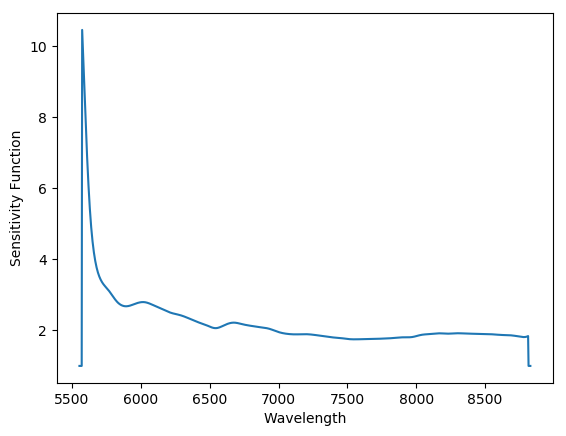

In [85]:
# Show
FxSpec.show_sensfunc()

### Flux

In [86]:
# Load
sci_specobjs, sci_header = arload.load_specobj('Science/spec1d_OFF_J1044p6306_LRISr_2016Feb16T112439.fits')
#
FxSpec.sci_specobjs = sci_specobjs
FxSpec.sci_header = sci_header
# Flux
FxSpec.flux_science()

[INFO]    :: arflux.py 370 load_extinction_data() - Using mkoextinct.dat for extinction corrections.
[INFO]    :: arflux.py 46 apply_sensfunc() - Fluxing boxcar extraction for:
             <SpecObjExp: O221-S1517-D02-I0022 == Setup dum_config Object at 0.221 in Slit at 0.1517 with det=02, scidx=22 and objtype=unknown>
[INFO]    :: arflux.py 46 apply_sensfunc() - Fluxing optimal extraction for:
             <SpecObjExp: O221-S1517-D02-I0022 == Setup dum_config Object at 0.221 in Slit at 0.1517 with det=02, scidx=22 and objtype=unknown>
[INFO]    :: arflux.py 370 load_extinction_data() - Using mkoextinct.dat for extinction corrections.
[INFO]    :: arflux.py 46 apply_sensfunc() - Fluxing boxcar extraction for:
             <SpecObjExp: O607-S1517-D02-I0022 == Setup dum_config Object at 0.607 in Slit at 0.1517 with det=02, scidx=22 and objtype=unknown>
[INFO]    :: arflux.py 46 apply_sensfunc() - Fluxing optimal extraction for:
             <SpecObjExp: O607-S1517-D02-I0022 == Setup dum_

In [87]:
# Write
FxSpec.write_science('Science/spec1d_OFF_J1044p6306_LRISr_2016Feb16T112439.fits')

[INFO]    :: arsave.py 451 save_1d_spectra_fits() - Wrote 1D spectra to Science/spec1d_OFF_J1044p6306_LRISr_2016Feb16T112439.fits
